#1. Titanic DataSet Introduction
##Understanding Real-life dataset
###It contains the following info:

**survival** - Survival (0 = No; 1 = Yes)
**class** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
**name** - Name
**sex** - Sex
**age** - Age
**sibsp** - Number of Siblings/Spouses Aboard
**parch** - Number of Parents/Children Aboard
**ticket** - Ticket Number
**fare** - Passenger Fare
**cabin** - Cabin
**embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
**boat** - Lifeboat (if survived)
**body** - Body number (if did not survive and body was recovered)

Note: Data covers passengers only, not crew.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### 1.1 Load the Data in Memory


1.   Add the required pyhton library imports
2.   Load the dataset
3.   Check the head values(max till 10) to understand the relationship b/w attributes

In [ ]:
#some formats accepted in import
import pandas as pd
#from pandas import read_csv as csvreader
#from pandas import read_csv
import os
from google.colab import drive
drive.mount("/content/gdrive")
os.chdir('/content/gdrive/MyDrive/Interview Kickstart/EDA Feature Engineering/Datasets')

Mounted at /content/gdrive


In [ ]:
#load the csv in the memory
titanic_dataset= pd.read_csv('Titanic-Dataset.csv')

In [ ]:
# View first lines of dataset
titanic_dataset.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


#2. EDA(Exploratory Data Analysis)

### 2.1. Understand the attributes and dataset


1.   Check for datatype of different attributes
2.   list if any missing values in the dataset.
3.   list any unwanted entries in the attributes(e.g. special characters in numerical fields)
4.   Look for data volume( no.of columns and rows)
5.   Look for cardinality of each column.

In [ ]:
titanic_dataset.shape

(891, 12)

Live coding - method to check out data types, missing values

In [ ]:
##

In [ ]:

##titanic_dataset.info()

In [ ]:
#number of missing values corresponding to each field
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_dataset = titanic_dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [ ]:
titanic_dataset.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


In [ ]:
titanic_dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
titanic_dataset = titanic_dataset.dropna()

In [ ]:
# get cardinality of the columns
titanic_dataset.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

In [ ]:
# use the DataFrame .describe() method to check out summary statistics of numeric columns
# describe() of pandas gives you a way to understand the statistical meaning of the data.
titanic_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
import numpy as np
print(np.unique(titanic_dataset['Embarked']))
print(titanic_dataset['Embarked'].value_counts())

['C' 'Q' 'S']
S    554
C    130
Q     28
Name: Embarked, dtype: int64


In [ ]:
print(np.unique(titanic_dataset['Sex']))
print(titanic_dataset['Sex'].value_counts())

['female' 'male']
male      453
female    259
Name: Sex, dtype: int64


In [ ]:
print(np.unique(titanic_dataset['Pclass']))
print(titanic_dataset['Pclass'].value_counts())

[1 2 3]
3    355
1    184
2    173
Name: Pclass, dtype: int64


In [ ]:
print(np.unique(titanic_dataset['SibSp']))
print(titanic_dataset['SibSp'].value_counts())

[0 1 2 3 4 5]
0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64


Text(0.5, 1.05, 'Survival Distribution')

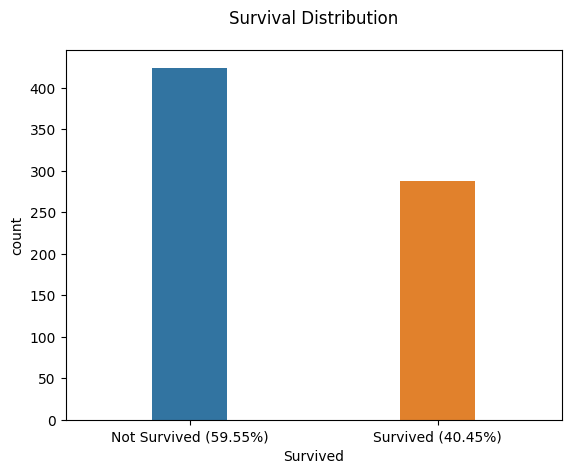

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# use seaborn to build a bar plot of Titanic survival, which is your target variable

survived = titanic_dataset['Survived'].value_counts()[1]
not_survived = titanic_dataset['Survived'].value_counts()[0]
survived_per = survived / titanic_dataset.shape[0] * 100
not_survived_per = not_survived / titanic_dataset.shape[0] * 100

sns.countplot(x='Survived', data=titanic_dataset, width=0.3);
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.title('Survival Distribution', size=12, y=1.05)
#Take-away: in the training set, less people survived than didn't

Text(0.5, 1.05, 'Sex Distribution')

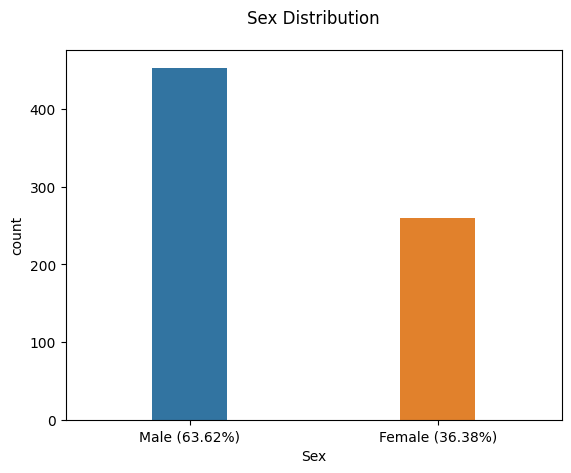

In [ ]:
# use seaborn to build a bar plot of the Titanic dataset feature 'Sex' (of df_train)

female = titanic_dataset['Sex'].value_counts()['female']
male = titanic_dataset['Sex'].value_counts()['male']
female_per = female / titanic_dataset.shape[0] * 100
male_per = male / titanic_dataset.shape[0] * 100

sns.countplot(x='Sex', data=titanic_dataset, width=0.3);
plt.xticks((1, 0), ['Female ({0:.2f}%)'.format(female_per), 'Male ({0:.2f}%)'.format(male_per)])
plt.title('Sex Distribution', size=12, y=1.05)

In [ ]:
titanic_dataset.groupby(['Sex']).Survived.sum()

Sex
female    195
male       93
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='Count'>

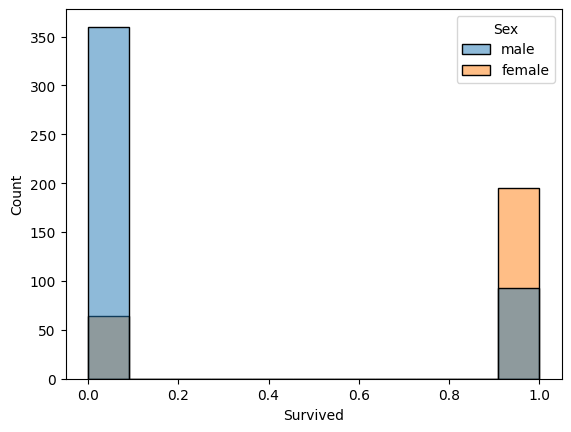

In [ ]:
# use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'
sns.histplot(data=titanic_dataset, x="Survived", hue="Sex")
# Take-away: Women were more likely to survive than men
# Below graph shows that out of around 400+ male 93 survived and rest did not.
# Also, out of 200+ female 95 dint survive and rest did.

In [ ]:
# titanic_dataset.groupby(['Pclass']).Survived.sum()

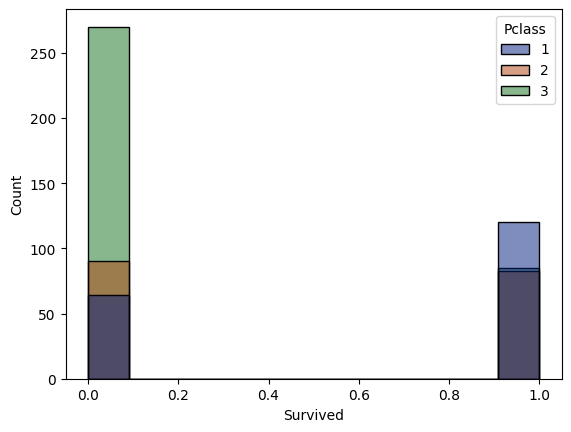

In [ ]:
# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'
sns.histplot(x='Survived', hue='Pclass', data=titanic_dataset, palette='dark');
#Take-away: Passengers that travelled in first class were more likely to survive.
#On the other hand, passengers travelling in third class were more unlikely to survive.

<Axes: xlabel='Survived', ylabel='Count'>

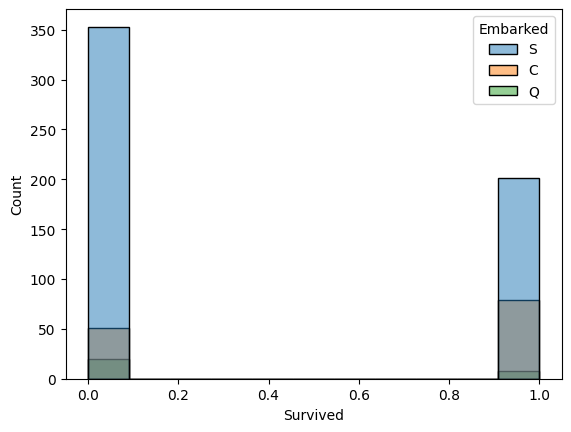

In [ ]:
# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'
sns.histplot(x='Survived', hue='Embarked', data=titanic_dataset)
# Take-away: Passengers that embarked in Southampton were less likely to survive.

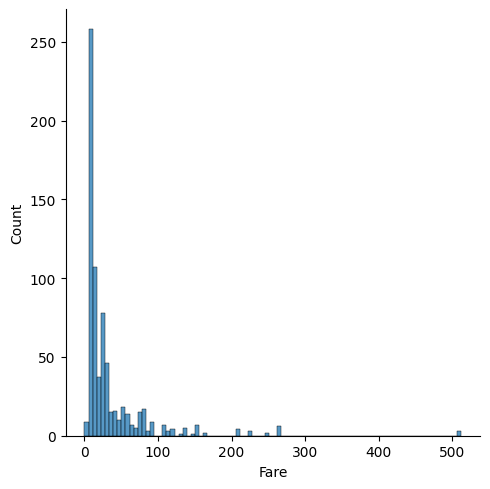

In [ ]:
# Use seaborn to plot a histogram of the 'Fare' column of titanic_dataset
sns.displot(titanic_dataset.Fare, kde=False)
# Take-away: Most passengers paid less than 100 for travelling with the Titanic

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Fare, dtype: object

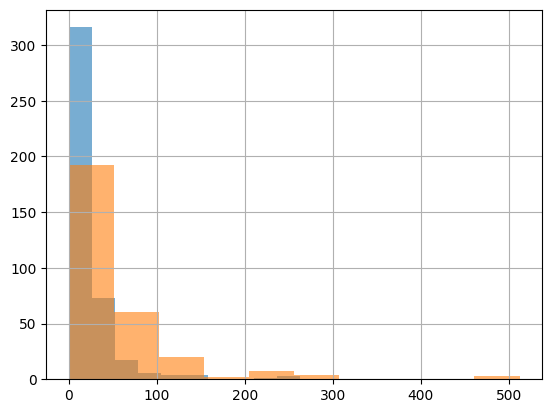

In [ ]:
# Use a pandas plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.
titanic_dataset.groupby('Survived').Fare.hist(alpha=0.6)
# Take-away: It looks as though those that paid more had a higher chance of surviving.

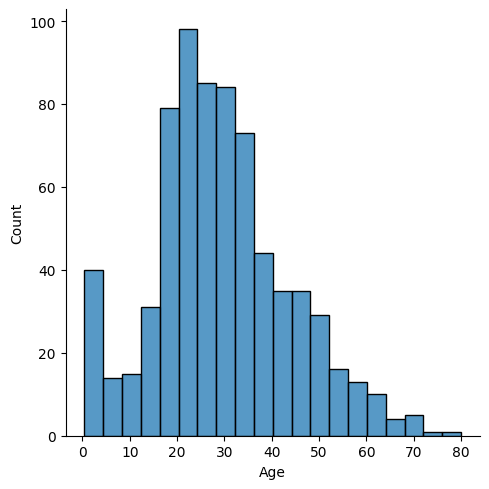

In [ ]:
#Use seaborn to plot a histogram of the 'Age' column of titanic_dataset. You'll need to drop null values before doing so
titanic_dataset_drop = titanic_dataset.dropna()
sns.displot(titanic_dataset_drop.Age, kde=False);

<ipython-input-35-f07c30a01d5d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-35-f07c30a01d5d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-35-f07c30a01d5d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-35-f07c30a01d5d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


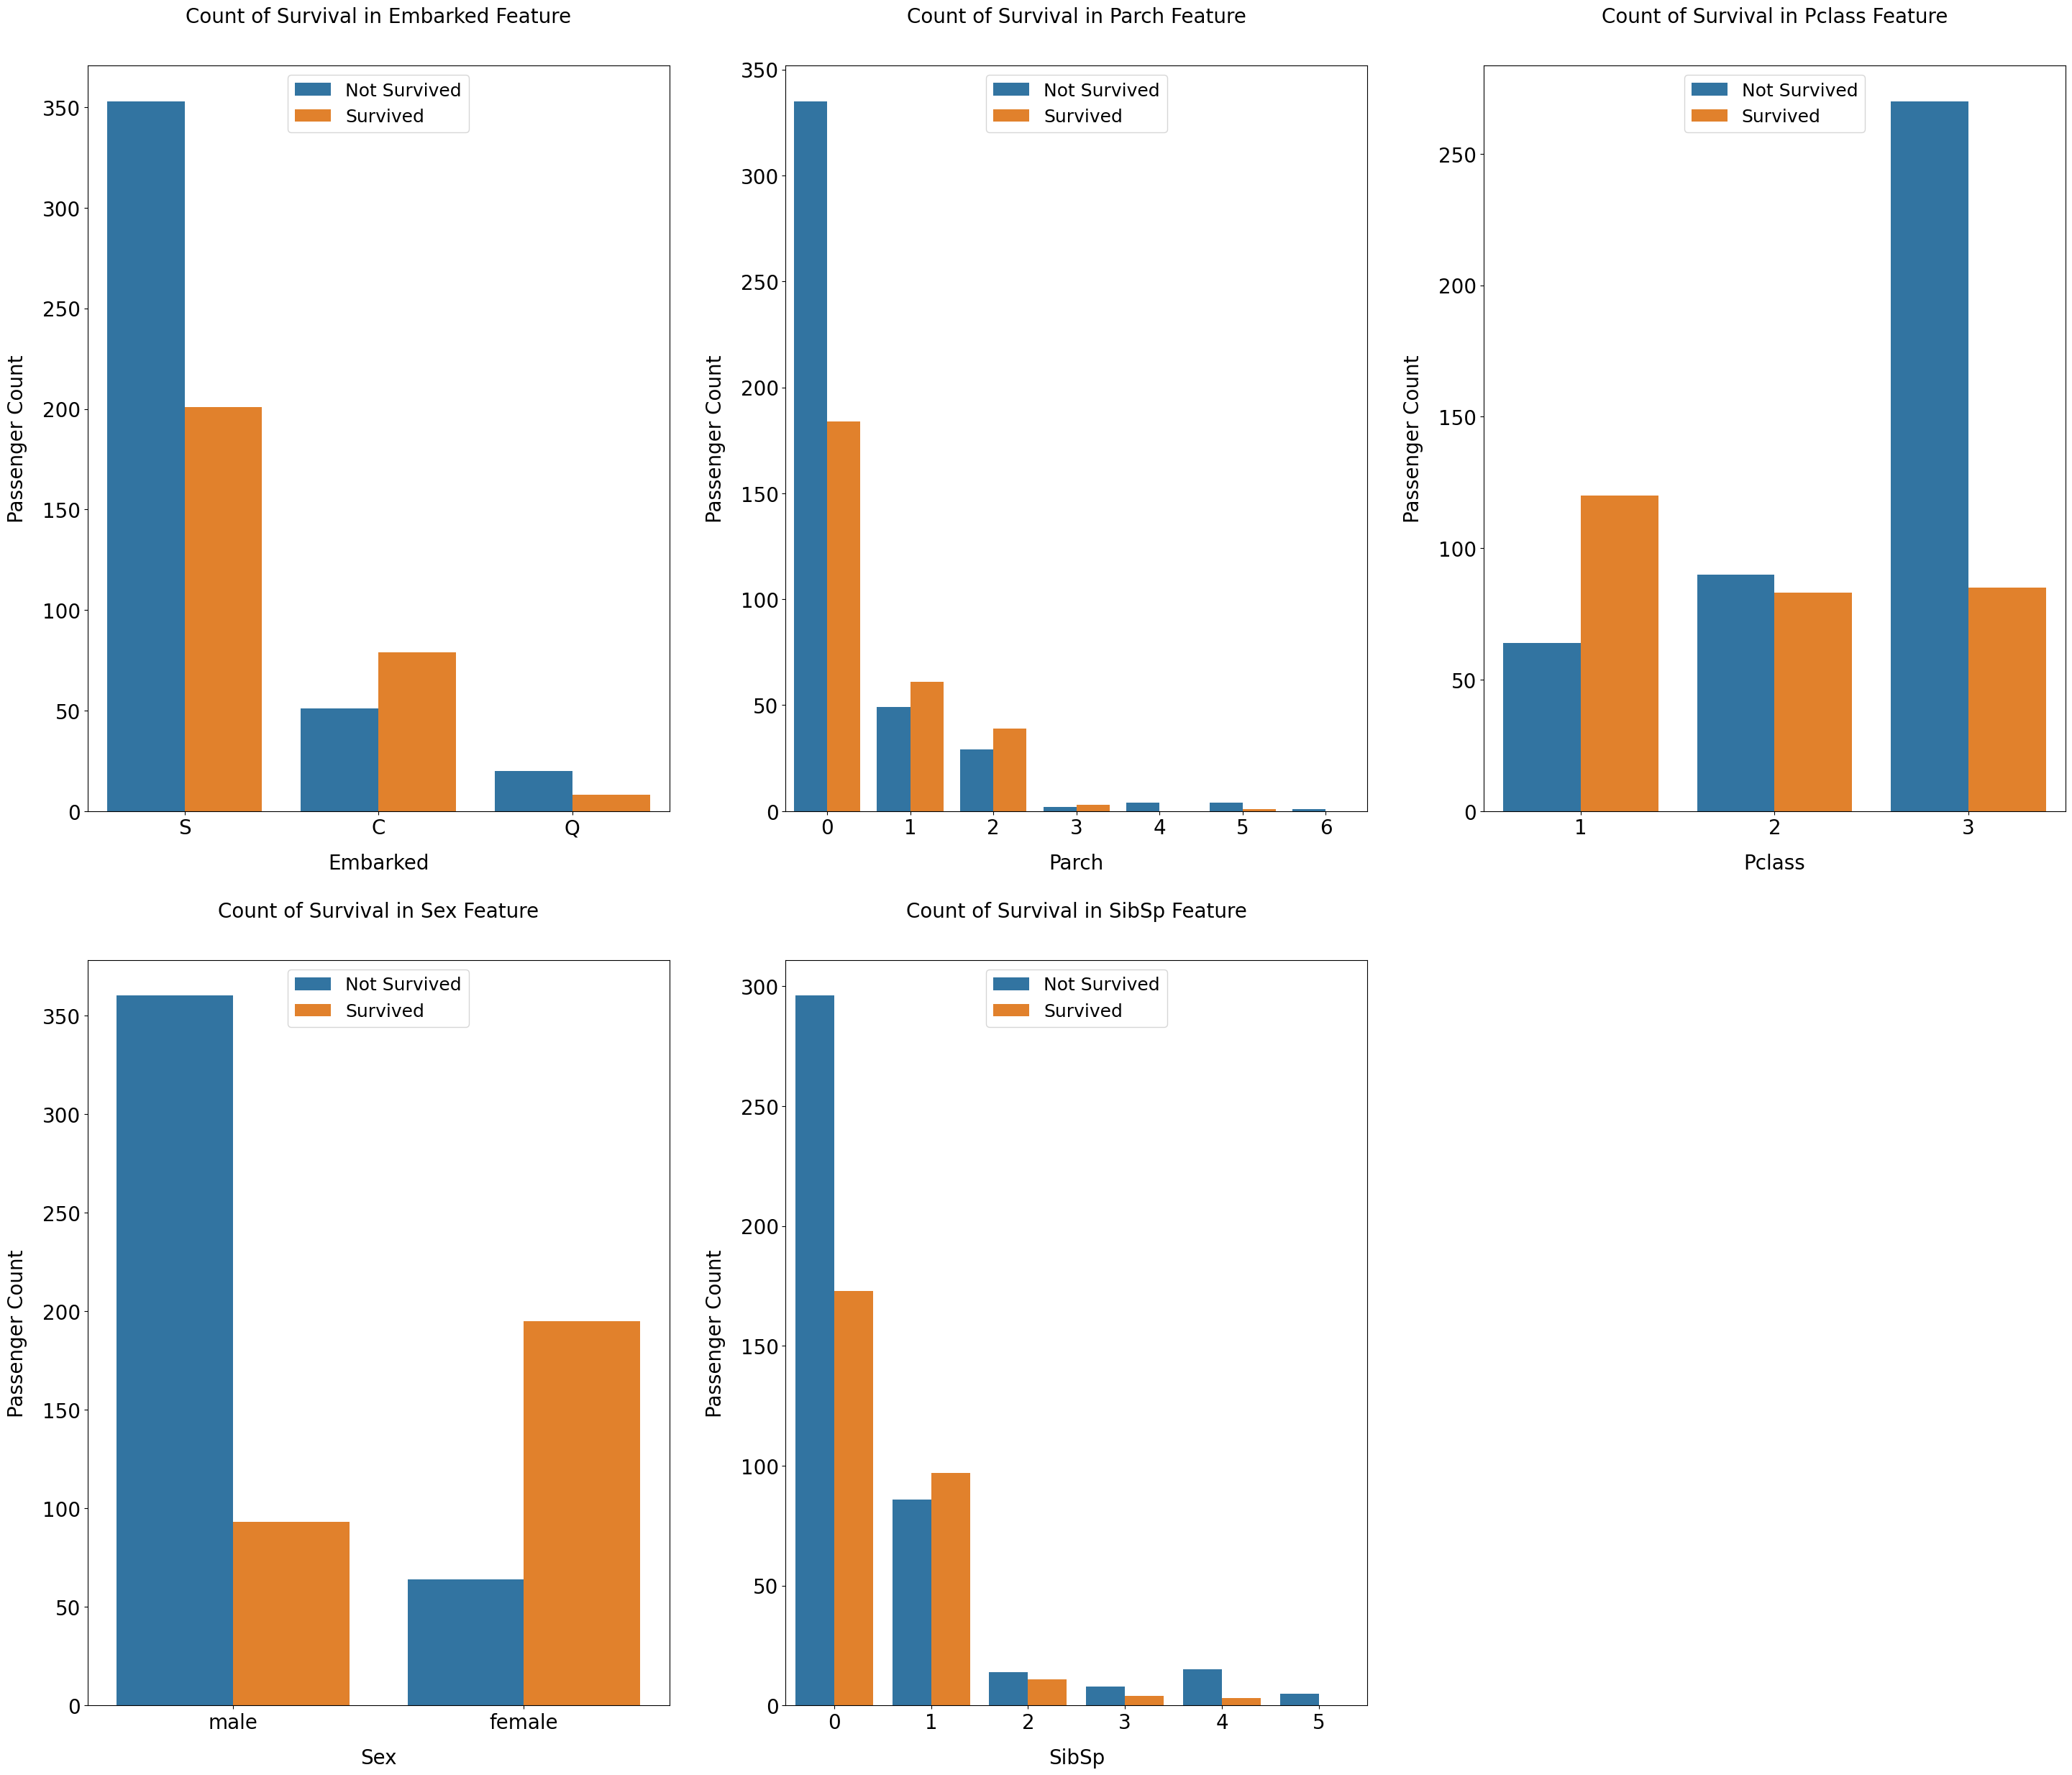

In [ ]:
#categorical features plotting
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=titanic_dataset)

    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

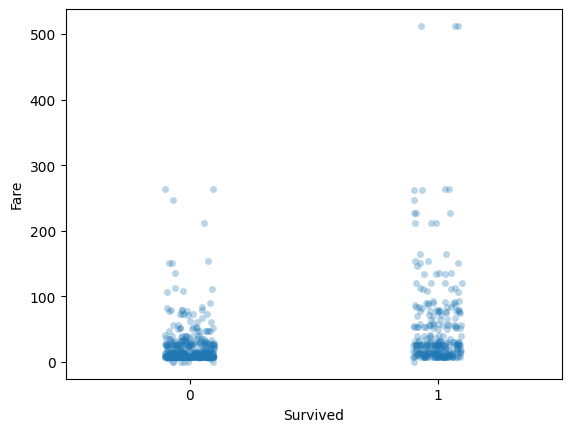

In [ ]:
# Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=titanic_dataset, alpha=0.3, jitter=True)

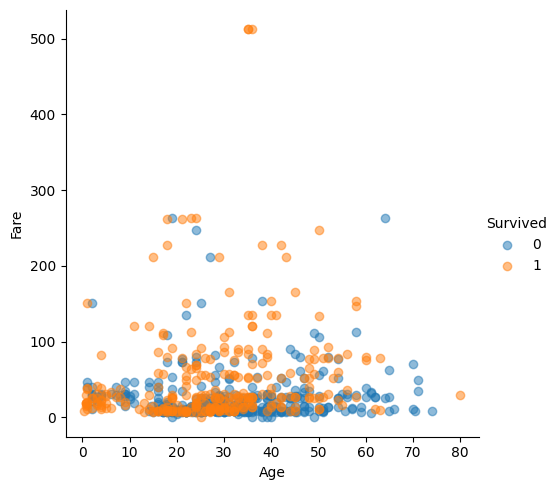

In [ ]:
# Use seaborn to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=titanic_dataset, fit_reg=False, scatter_kws={'alpha':0.5})
# Take-away: It looks like those who survived either paid quite a bit for their ticket or they were young

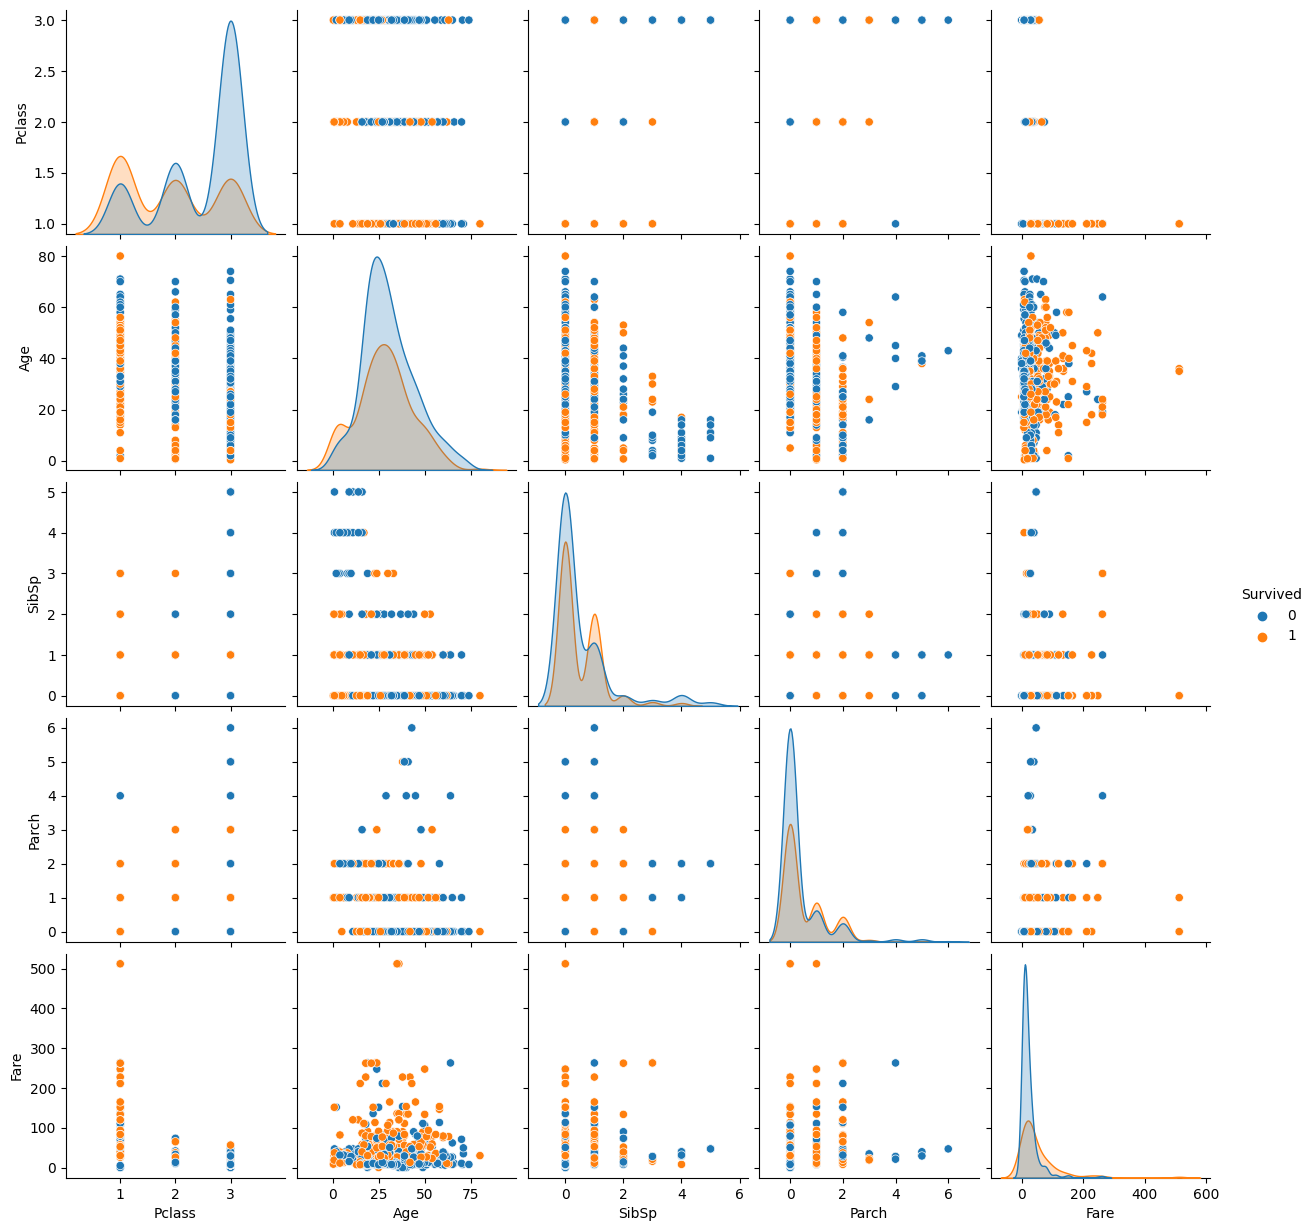

In [ ]:
# Use seaborn to create a pairplot of titanic_dataset, colored by 'Survived'.
# A pairplot is a great way to display most of the information that you have already
# discovered in a single grid of plots.
sns.pairplot(titanic_dataset_drop, hue='Survived')

# 3. Dataset Split

In [ ]:
#dividing dataset into the features and target to be predicted
target = titanic_dataset["Survived"]
features = titanic_dataset.drop(["Survived"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Check the shape of X_train, X_test, y_train, y_test
X_train.shape

(498, 7)

In [ ]:
y_train.shape

(498,)

In [ ]:
X_test.shape

(214, 7)

In [ ]:
y_test.shape

(214,)

#4. Feature Engineering


####4.1. Correlations Coefficient between different vaiable pair
##### The coefficient analysis is highly useful in understanding the important features to build the model.
#####Like here we see that Pclass and FAre are highly correlated, and from the EDa above we found out that Pclass 1 people were likely to survive more than others.If we build the model now to predict the survival of passengers, we should consider these two variables/features in our model.

In [ ]:
df_train_corr = X_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

<ipython-input-44-cdf05c0b0a4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_corr = X_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()


In [ ]:
# Correlation Coefficient in training dataset with coeffiecient more than 0.1
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.557151
8,Parch,SibSp,0.444370
10,Age,Pclass,0.372248
12,SibSp,Age,0.347861
14,Parch,Fare,0.214565
16,Parch,Age,0.206153
18,SibSp,Fare,0.192333


####4.2. Heatmap to visualize Correlation


<ipython-input-46-cf669240c673>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')


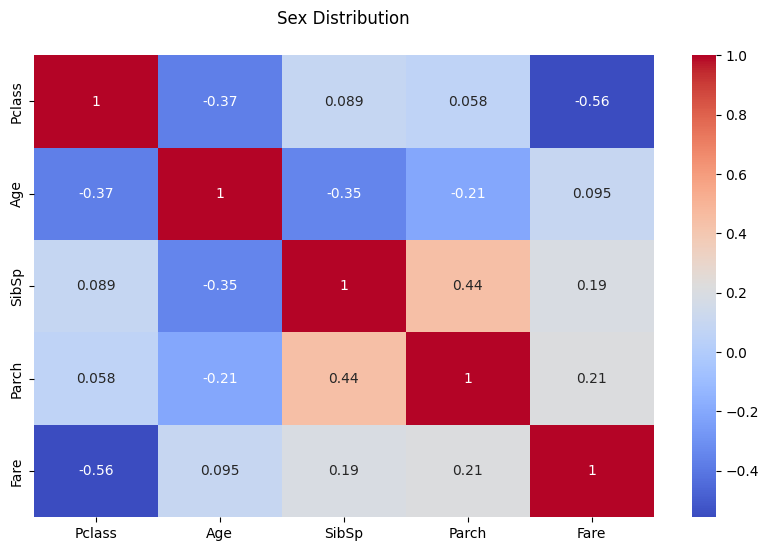

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Sex Distribution', size=12, y=1.05)
plt.show()

####**4.3. Binning Continuous Features**

Divide the continuous features like age and fare in different bins to analyze better

**Fare** feature is positively skewed and survival rate is extremely high on the right end. The groups at the left side of the graph has the lowest survival rate and the groups at the right side of the graph has the highest survival rate.There is also an unusual group **(18.782, 26.0]** in the middle with high survival rate that is captured in this process.

In [ ]:
titanic_dataset['Fare'] = pd.qcut(titanic_dataset['Fare'], 13)

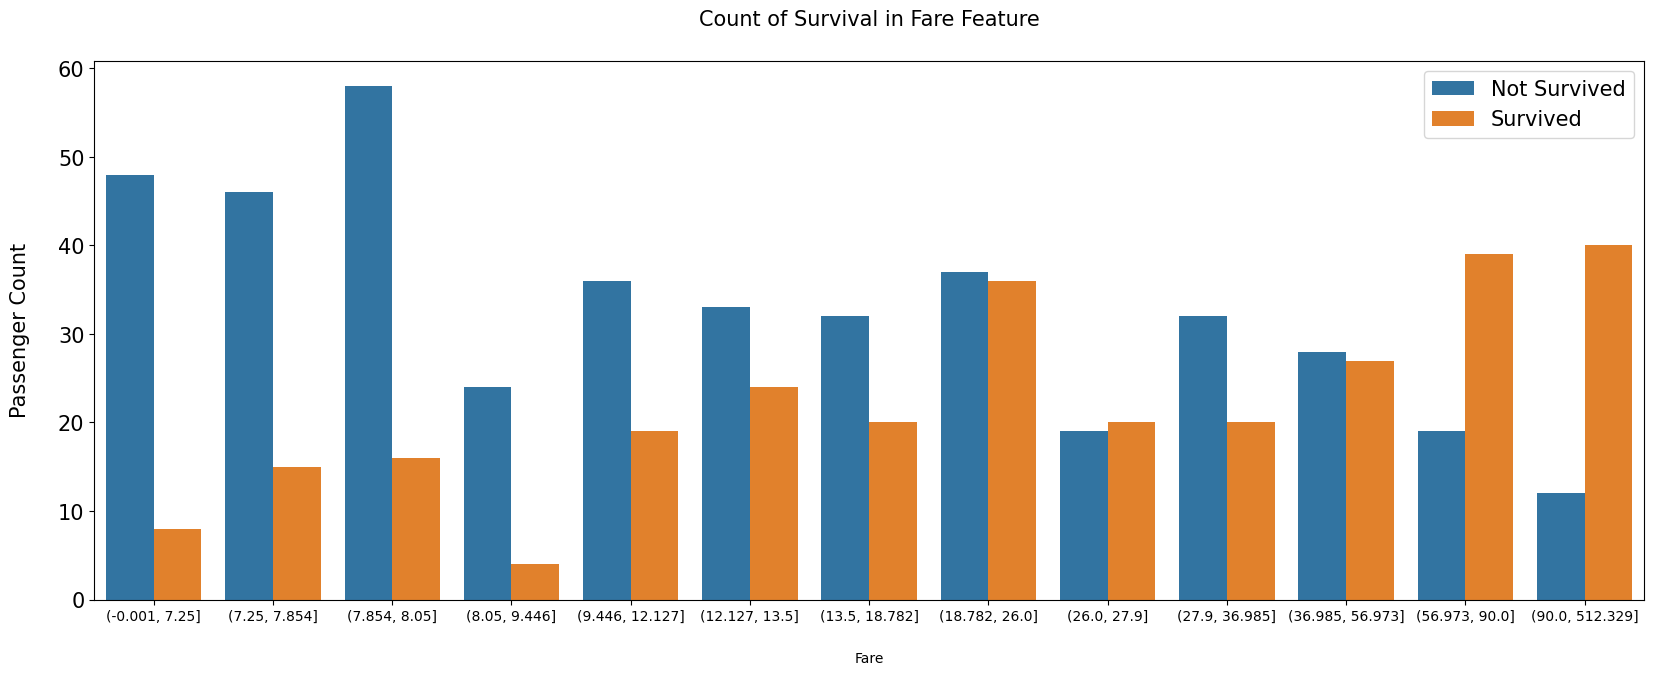

In [ ]:
fig, axs = plt.subplots(figsize=(20, 7))
sns.countplot(x='Fare', hue='Survived', data=titanic_dataset)

plt.xlabel('Fare', size=10, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

**Age** feature has a normal distribution with some spikes. The first bin has the highest survival rate and 2nd bin has the lowest survival rate. There is also an unusual group (31.0, 36.0] with high survival rate that is captured in this process.

In [ ]:
titanic_dataset['Age'] = pd.qcut(titanic_dataset['Age'], 10)

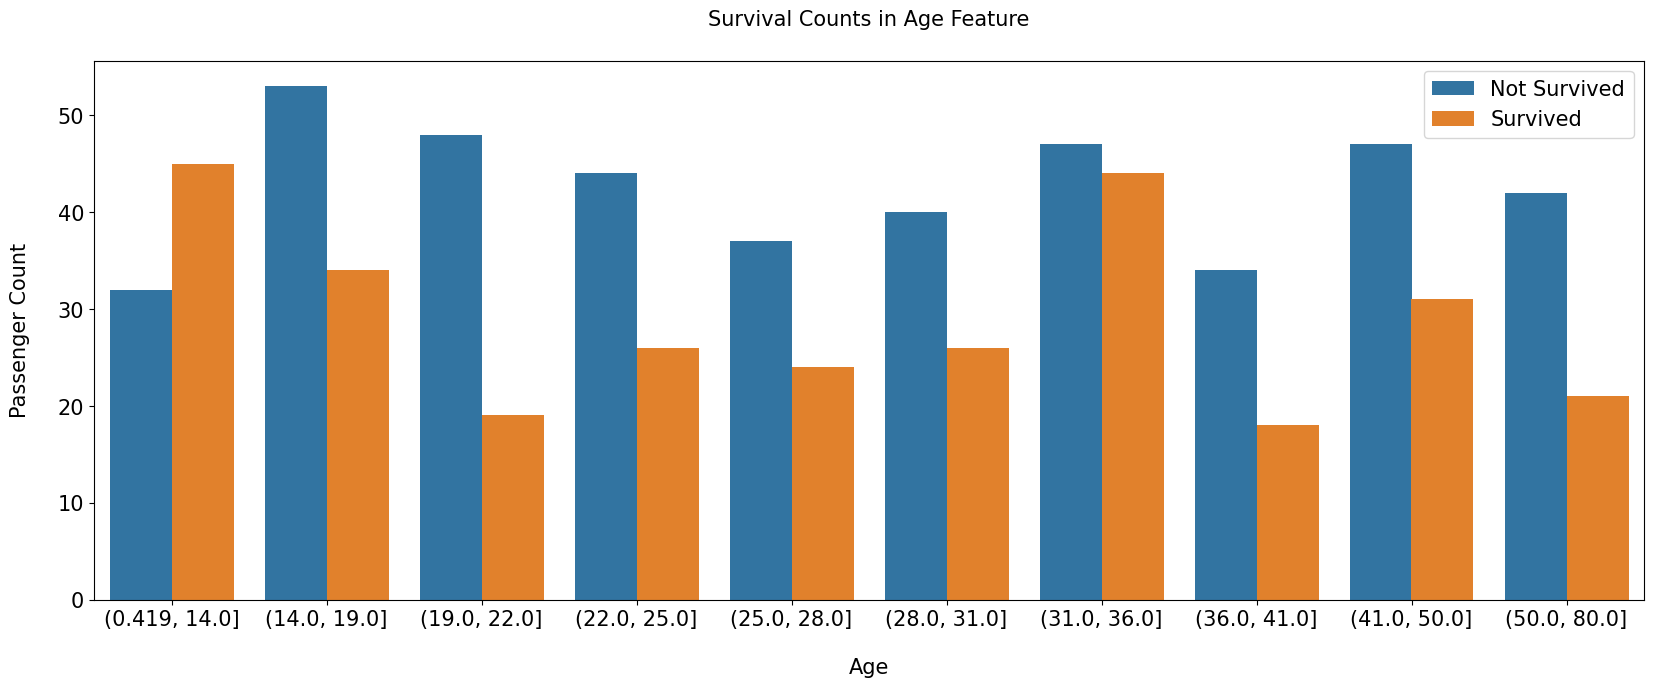

In [ ]:
fig, axs = plt.subplots(figsize=(20, 7))
sns.countplot(x='Age', hue='Survived', data=titanic_dataset)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

####**4.4. Feature Transformation**

**Label Encoding Non-Numerical Features**
`Embarked`, `Sex` are object type, and `Age` and `Fare` features are category type. They are converted to numerical type with LabelEncoder. LabelEncoder basically labels the classes from 0 to n. This process is necessary for models to learn from those features.


# New Section

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
dfs = [X_train, X_test]
non_numeric_features = ['Embarked', 'Sex', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])

In [ ]:
df[feature]

641     95
496    101
262    103
311    122
551     64
      ... 
818      2
478      8
325    113
175     16
37      19
Name: Fare, Length: 214, dtype: int64

**One-Hot Encoding the Categorical Features**
The categorical features (`Pclass`, `Sex`, `Embarked`) are converted to one-hot encoded features with OneHotEncoder. `Age` and `Fare` features are not converted because they are ordinal unlike the previous ones.

In [ ]:
cat_features = ['Pclass', 'Sex', 'Embarked']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([X_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([X_test, *encoded_features[6:]], axis=1)

In [ ]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,...,Embarked_2,Embarked_3,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Embarked_1,Embarked_2,Embarked_3
58,2.0,0.0,8.0,1.0,2.0,103.0,2.0,0.0,1.0,0.0,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,3.0,1.0,34.0,0.0,0.0,13.0,0.0,0.0,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1.0,1.0,78.0,0.0,0.0,119.0,0.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,3.0,1.0,29.0,0.0,0.0,8.0,2.0,0.0,0.0,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,3.0,1.0,39.0,0.0,0.0,23.0,2.0,0.0,0.0,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
641,1,0,20,0,0,95,0
496,1,0,55,1,0,101,0
262,1,1,53,1,1,103,2
311,1,0,13,2,2,122,0
551,2,1,24,0,0,64,2


**Conclusion**
Age and Fare features are binned. Binning helped dealing with outliers and it revealed some homogeneous groups in those features.

Finally, the non-numeric type features are label encoded and categorical features are one-hot encoded. Dropped the useless features after encoding.